# Building a Mchine learning model using Clustering Algorithms to identify Clusters for Crime Data

In [2]:
#Importing Essential libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


In [242]:
df=pd.read_csv(r'C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\07. Clustering\crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [243]:
df2=df.rename(columns={'Unnamed: 0': 'Location'})
df2.head()

,Location,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


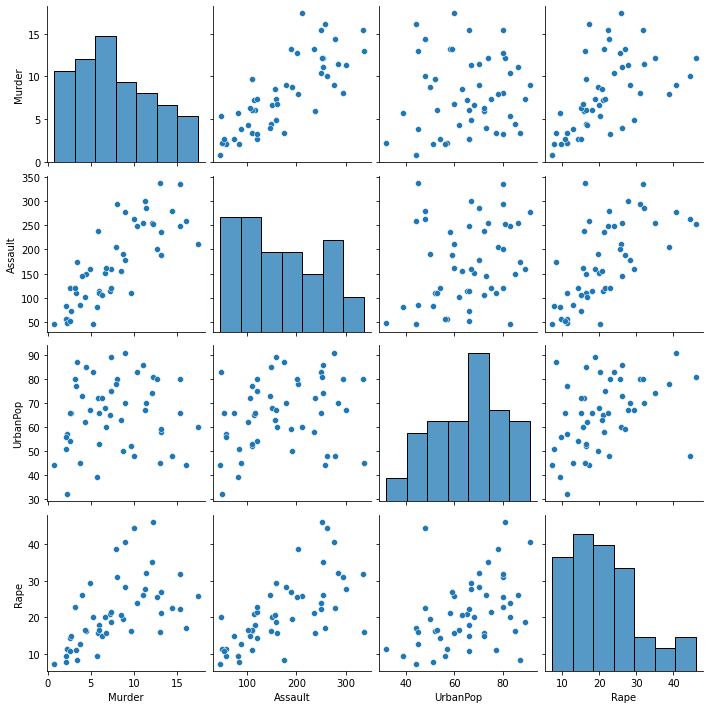

In [7]:
sns.pairplot(df)

<AxesSubplot:xlabel='Location', ylabel='Murder'>

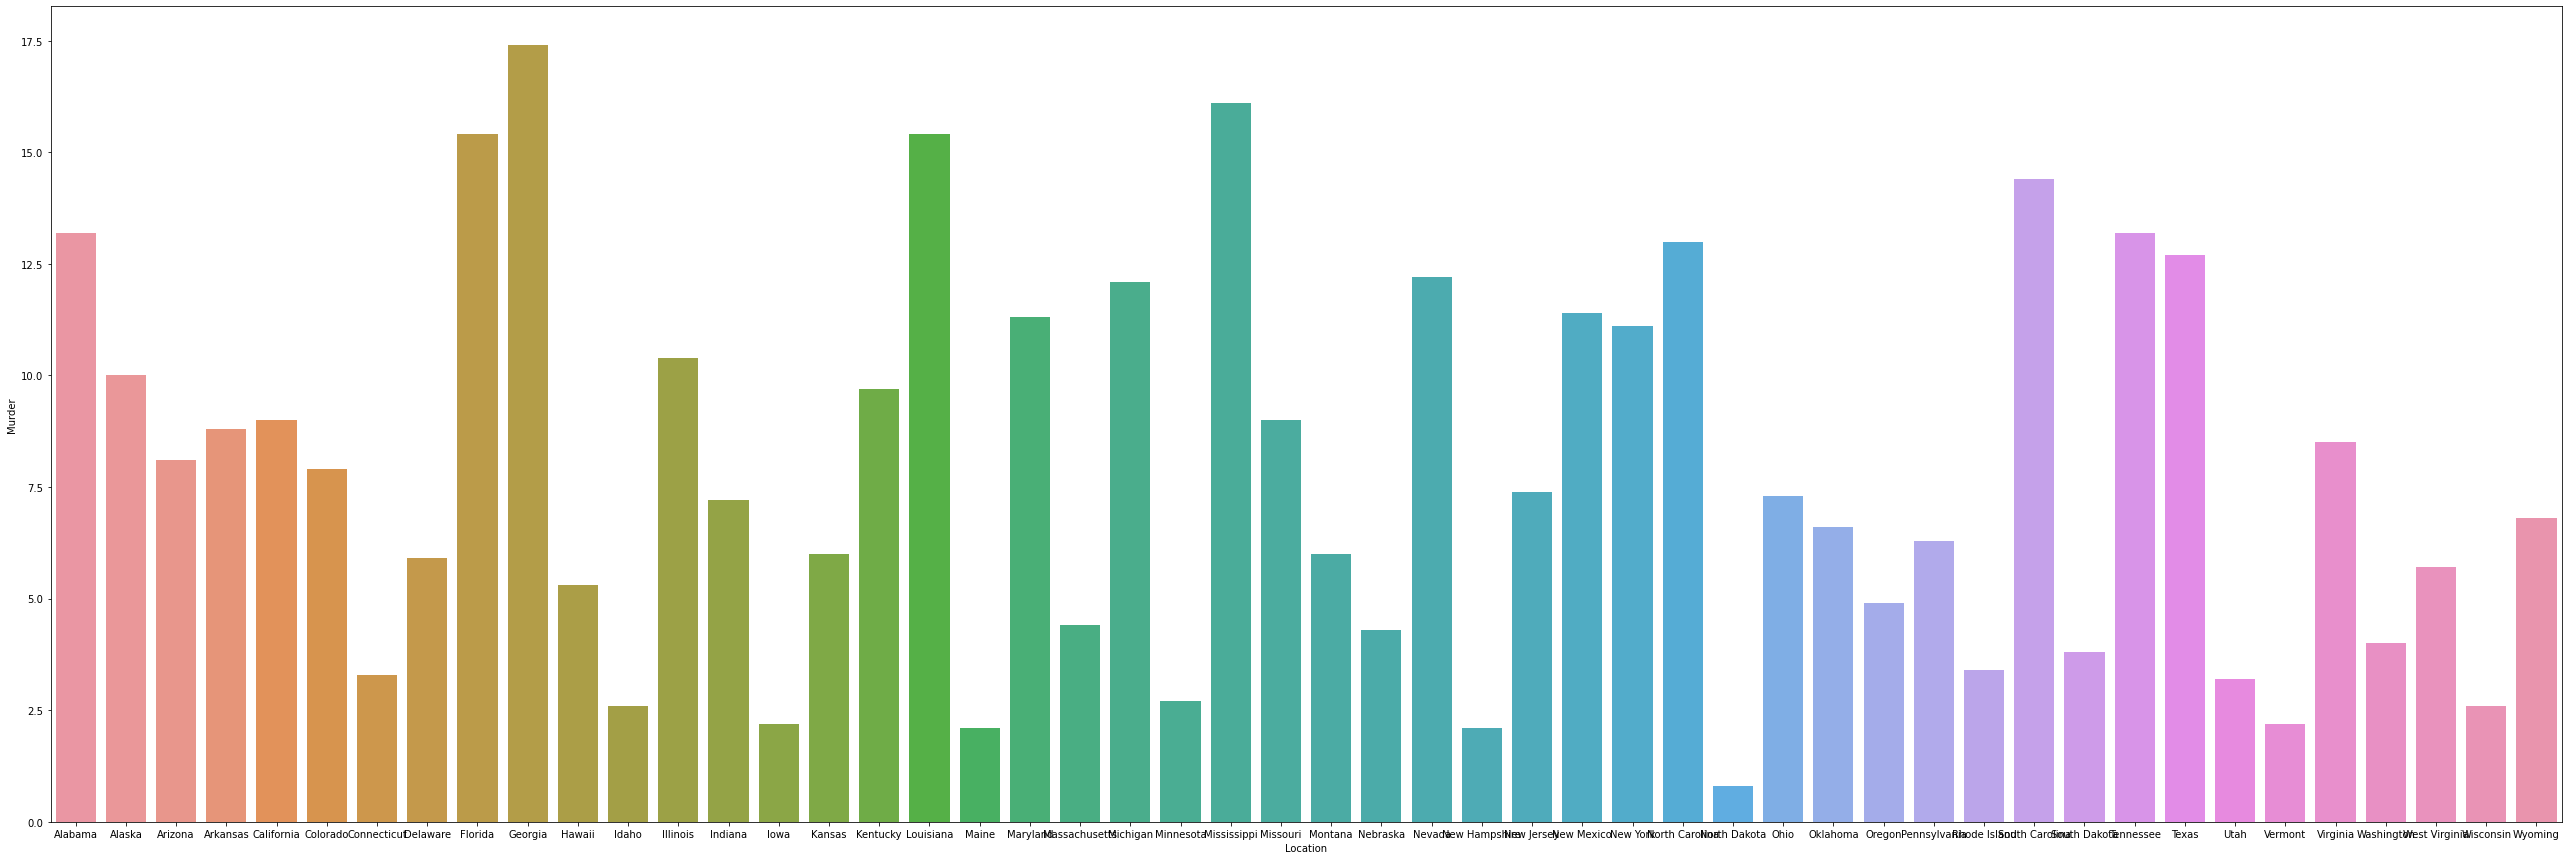

In [40]:
# Locationwise Murders
fig, ax = plt.subplots(figsize=(45, 15))
sns.barplot(y='Murder', x='Location', data=df,ax=ax)


<AxesSubplot:xlabel='Location', ylabel='Assault'>

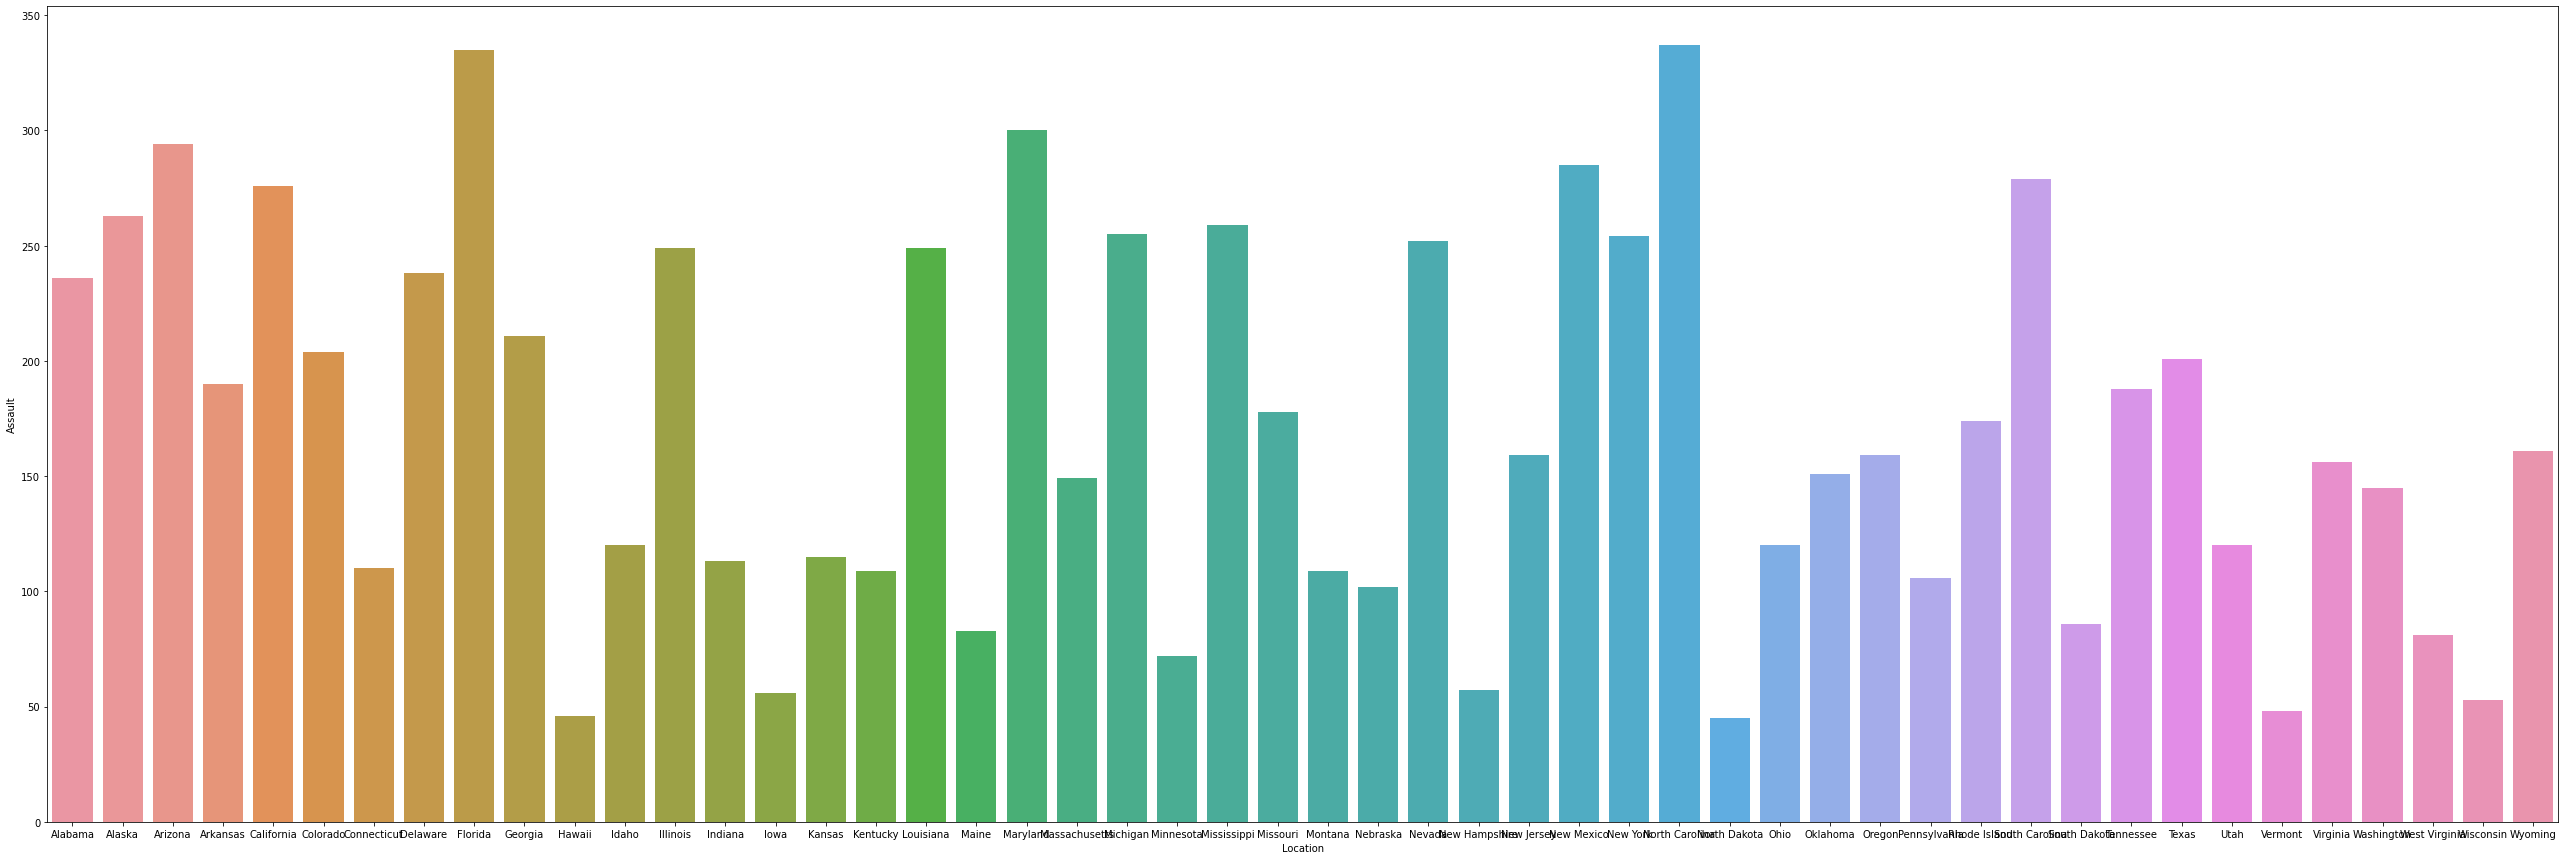

In [41]:
# Locationwise Murders
fig, ax = plt.subplots(figsize=(45, 15))
sns.barplot(y='Assault', x='Location', data=df,ax=ax)


In [245]:
label_encoder=LabelEncoder()
df2['Location']= label_encoder.fit_transform(df2['Location'])

In [247]:
df1=df2.drop(columns='Location',axis=1)
df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [248]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [249]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df1.iloc[:,:])

In [250]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


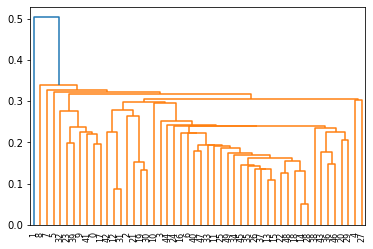

In [251]:
# create dendrogram

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

# Building a Hierarchical Clustering model

In [252]:
from sklearn.cluster import AgglomerativeClustering

In [253]:
hierarchy=AgglomerativeClustering(n_clusters=5,affinity='Euclidean', linkage='single')

In [254]:
hierarchy_label=hierarchy.fit_predict(df_norm)

In [255]:
hierarchy_label

array([0, 3, 0, 0, 0, 4, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [256]:
from sklearn.metrics import silhouette_score

In [257]:
#Silhouette Score for hierarchical clustering
sil_score=silhouette_score(df_norm,hierarchy_label)

In [258]:
sil_score

-0.18215418215195153

In [259]:
df['HIERARCHICAL_label_data']=label_data
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,HIERARCHICAL_label_data
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


# Building KMeans Clustering Model

In [260]:
from sklearn.cluster import KMeans

In [261]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1)
scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

C:\Users\aravi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


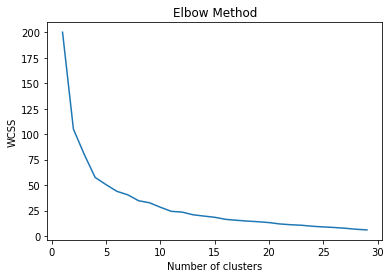

In [262]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [263]:
# Choosing the number of clusters with the help of Elbow method
kmeans_clustering=KMeans(n_clusters=10, random_state=42)

In [264]:
kmeans_clustering.fit(scaled_df)

KMeans(n_clusters=10, random_state=42)

In [265]:
kmeans_labels=kmeans_clustering.labels_

In [266]:
kmeans_labels

array([0, 8, 6, 2, 9, 9, 1, 2, 4, 0, 7, 3, 6, 2, 3, 2, 2, 0, 3, 4, 7, 4,
       1, 5, 6, 2, 2, 9, 3, 7, 4, 6, 5, 3, 7, 2, 7, 1, 1, 5, 3, 0, 6, 7,
       3, 2, 7, 3, 1, 2])

In [267]:
# Silhouette Score for KMeans Clustering Model
sil_score_kmeans=silhouette_score(scaled_df, kmeans_labels)

In [268]:
sil_score_kmeans

0.2636703762849359

In [269]:
df['KMEANS_label_data']=label_data
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,HIERARCHICAL_label_data,KMEANS_label_data
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,-1,-1
2,Arizona,8.1,294,80,31.0,-1,-1
3,Arkansas,8.8,190,50,19.5,-1,-1
4,California,9.0,276,91,40.6,-1,-1


# Building DBSCAN Clustering Model

In [270]:
array=df1.values
df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [271]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [272]:
X = StandardScaler().fit_transform(array)

In [273]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [274]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=4)

In [275]:
#Noisy samples are given the label -1.
label_data=dbscan.labels_

In [276]:
df['DBSCAN_label_data']=label_data
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,HIERARCHICAL_label_data,KMEANS_label_data,DBSCAN_label_data
0,Alabama,13.2,236,58,21.2,0,0,0
1,Alaska,10.0,263,48,44.5,-1,-1,-1
2,Arizona,8.1,294,80,31.0,-1,-1,-1
3,Arkansas,8.8,190,50,19.5,-1,-1,-1
4,California,9.0,276,91,40.6,-1,-1,-1


In [277]:
Sil_score_dbscan=silhouette_score(X,label_data)
Sil_score_dbscan

0.2051154919322

# Conclusion

# Different Clusters Created for Crime Data by using Hierarchical, KMeans &  DBSCAN clustering methods

In [279]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,HIERARCHICAL_label_data,KMEANS_label_data,DBSCAN_label_data
0,Alabama,13.2,236,58,21.2,0,0,0
1,Alaska,10.0,263,48,44.5,-1,-1,-1
2,Arizona,8.1,294,80,31.0,-1,-1,-1
3,Arkansas,8.8,190,50,19.5,-1,-1,-1
4,California,9.0,276,91,40.6,-1,-1,-1
5,Colorado,7.9,204,78,38.7,-1,-1,-1
6,Connecticut,3.3,110,77,11.1,1,1,1
7,Delaware,5.9,238,72,15.8,-1,-1,-1
8,Florida,15.4,335,80,31.9,-1,-1,-1
9,Georgia,17.4,211,60,25.8,-1,-1,-1
